In [1]:
# Import libraries
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.pyplot as plt

In [7]:
# Specify filepaths and filenames.
filepath = 'Data/'
filename = '2023-06-27_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

print(data.shape)
data.columns

(4044, 301)


Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul',
       'tp_aug', 'tp_sep', 'altitude_climate'],
      dtype='object', length=301)

In [8]:
# Get stats
# Stats for quality of approximate locations and altitudes:
mean_loc_diff_east = data.loc[data['approx_loc'] != 'Y', 'diff_east'].mean()
min_loc_diff_east = data.loc[data['approx_loc'] != 'Y', 'diff_east'].min()
max_loc_diff_east = data.loc[data['approx_loc'] != 'Y', 'diff_east'].max()
sd_loc_diff_east = data.loc[data['approx_loc'] != 'Y', 'diff_east'].std()

mean_loc_diff_north = data.loc[data['approx_loc'] != 'Y', 'diff_north'].mean()
min_loc_diff_north = data.loc[data['approx_loc'] != 'Y', 'diff_north'].min()
max_loc_diff_north = data.loc[data['approx_loc'] != 'Y', 'diff_north'].max()
sd_loc_diff_north = data.loc[data['approx_loc'] != 'Y', 'diff_north'].std()

mean_altitude_diff = data.loc[data['approx_altitude'] != 'Y', 'diff_altitude'].mean()
min_altitude_diff = data.loc[data['approx_altitude'] != 'Y', 'diff_altitude'].min()
max_altitude_diff = data.loc[data['approx_altitude'] != 'Y', 'diff_altitude'].max()
sd_altitude_diff = data.loc[data['approx_altitude'] != 'Y', 'diff_altitude'].std()

# Number of instances of winter balance: 3680
no_winter = data['balance_winter'].notna().sum()

# Number of instances of summer balance: 3805
no_summer = data['balance_summer'].notna().sum()

# Number of instances of annual balance: 3839
no_annual = data['balance_netto'].notna().sum()

# Number of points with exact coordinates: 3717 of 4046
no_exact_locs = (data['approx_loc'].values == 'N').sum()

# Number of points with approximate coordinates: 329 of 4046
no_approx_locs = (data['approx_loc'].values == 'Y').sum()
    
# Number of points with exact altitude: 4009
no_exact_alt = (data['approx_altitude'].values == 'N').sum()

# Number of points with exact altitude: 37
no_approx_alt = (data['approx_altitude'].values == 'Y').sum()

# Number of points w/o exact coordinates or altitude: 32
no_approx_both = ((data['approx_altitude'].values == 'Y') & (data['approx_loc'].values == 'Y')).sum()
   
# Number of unique glacier IDs: 32
no_unique_id = data['BREID'].nunique()    

# List of unique glacier IDs:
list_unique_id = list(data['BREID'].unique())

# Unique glacier IDs with number of entries per ID.
# Index is glacier ID and column is number of entries per glacier ID.
len_rec_per_id = data['BREID'].value_counts().to_frame()    

In [9]:
# Summary
print('Total number of points: ' + str(data.shape[0]))
print('Number of unique ids: ' + str(no_unique_id))
print('Number of annual mass balance: ' + str(no_annual))
print('Number of winter mass balance: ' + str(no_winter))
print('Number of summer mass balance: ' + str(no_summer))

Total number of points: 4044
Number of unique ids: 32
Number of annual mass balance: 3839
Number of winter mass balance: 3680
Number of summer mass balance: 3803


In [10]:
# Count number of instances of winter, summer and annual mass balance for each glacier
#data_pergla = data.groupby('BREID').count()
#data_pergla[['balance_winter', 'balance_summer','balance_netto']]

#TO-DO: Plot as circles on map


In [12]:
# Make column with year from current year max date
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

<Figure size 640x480 with 0 Axes>

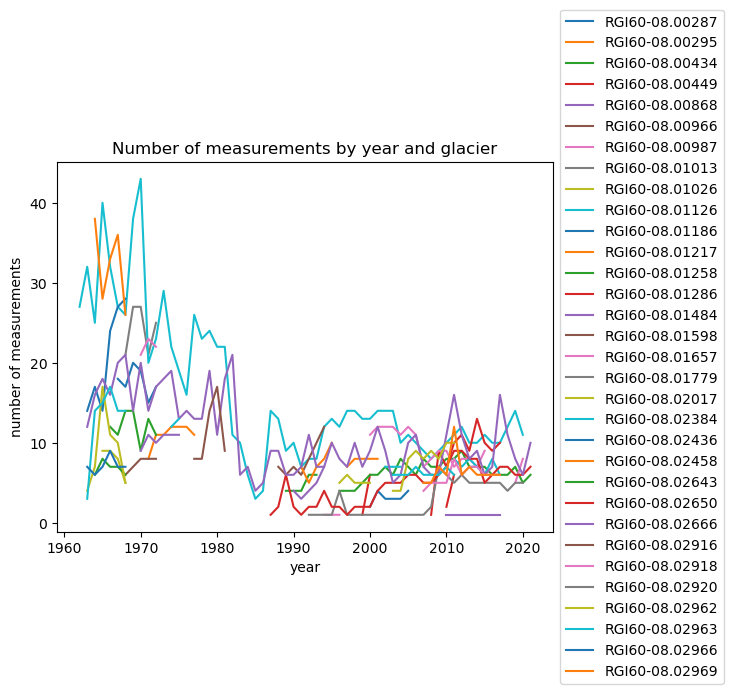

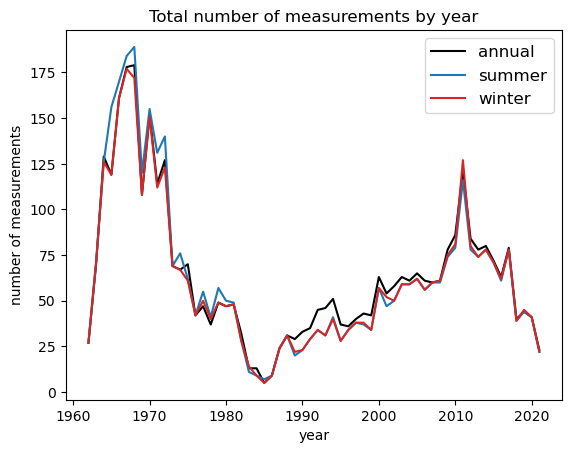

In [14]:
# Plot number of measurements by year, RGIID and type of measurement

# Plot number of measurements per glacier
plt.figure()
data.groupby(['year', "RGIID"]).size().unstack().plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Number of measurements by year and glacier')
plt.ylabel('number of measurements')
plt.show()

data_netto = data[~data['balance_netto'].isnull()]
data_summer = data[~data['balance_summer'].isnull()]
data_winter = data[~data['balance_winter'].isnull()]

# Plot number of measurements per type of measurement
plt.figure()
data_netto.groupby(['year']).size().plot(color='k', legend='annual')
data_summer.groupby(['year']).size().plot(color='C0', legend='summer')
data_winter.groupby(['year']).size().plot(color='C3', legend='winter')
plt.title('Total number of measurements by year')
plt.ylabel('number of measurements')
plt.legend(['annual', 'summer', 'winter'], prop={'size': 12})
plt.show()

# TO-DO: Plot CUMULATIVE number of measurements per type of measurement

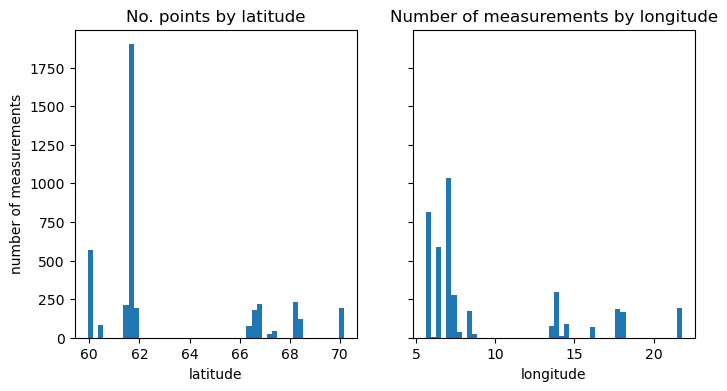

In [25]:
# Plot number of measurements by geographical location

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)
data['lat'].plot.hist(bins=50, ax=ax1)
ax1.set_title('No. points by latitude')
ax1.set_ylabel('number of measurements')
ax1.set_xlabel('latitude')
data['lon'].plot.hist(bins=50, ax=ax2)
ax2.set_title('Number of measurements by longitude')
ax2.set_ylabel('number of measurements')
ax2.set_xlabel('longitude')

# By latitude and longitude
colors = np.random.rand(data['RGIID'].unique().size)
c = plt.cm.tab10(colors)

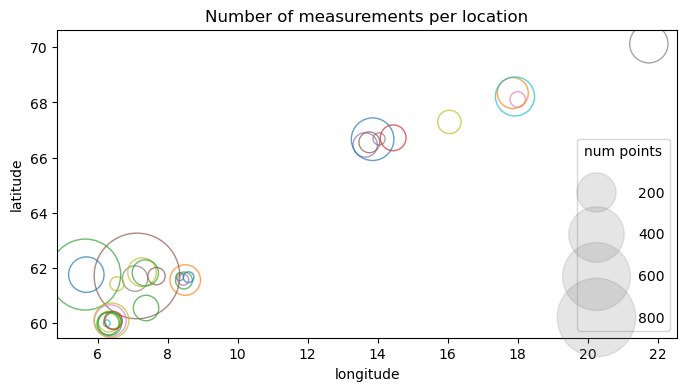

In [26]:
# By latitude and longitude
colors = np.random.rand(data['RGIID'].unique().size)
c = plt.cm.tab10(colors)

plt.figure(figsize=(8,4))
#labels = list(data['RGIID'].unique())
sc=plt.scatter(x=data.groupby(["RGIID"])['lon'].mean().values, 
               y=data.groupby(["RGIID"])['lat'].mean().values, 
               s=data.groupby(["RGIID"]).size().values*4,
               facecolors='None', edgecolors=c, lw=1, alpha=0.7)#alpha=0.5)#, markerfacecolor="None");#* 200);
#data_netto['lat'].plot.hist(bins=50)
handles, labels = sc.legend_elements(prop="sizes", alpha=0.2, num=5, color='grey')#, fill=None)     
labels = ["200", "400", "600", "800"]     
legend = plt.legend(handles, labels, loc="lower right", title="num points",labelspacing=2, handletextpad=2)
#plt.legend(*sc.legend_elements("sizes", num=6))
plt.title('Number of measurements per location')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.show()

Text(0.5, 0, 'slope (radians? 0.5rad = 28.7deg)')

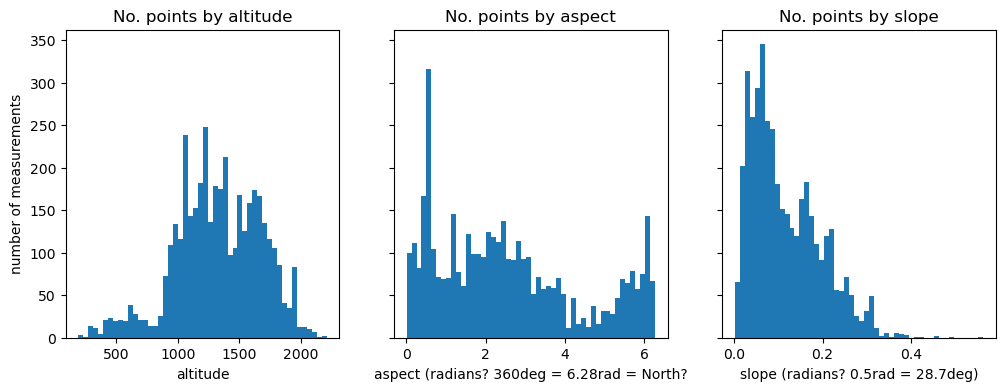

In [22]:
# Number of measurements by topography

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)
data['altitude'].plot.hist(bins=50, ax=ax1)
ax1.set_title('No. points by altitude')
ax1.set_ylabel('number of measurements')
ax1.set_xlabel('altitude')

data['aspect'].plot.hist(bins=50, ax=ax2)
ax2.set_title('No. points by aspect')
ax2.set_xlabel('aspect (radians? 360deg = 6.28rad = North?')

data['slope'].plot.hist(bins=50, ax=ax3)
ax3.set_title('No. points by slope')
ax3.set_xlabel('slope (radians? 0.5rad = 28.7deg)')

Text(0.5, 0, 'winter mass balance')

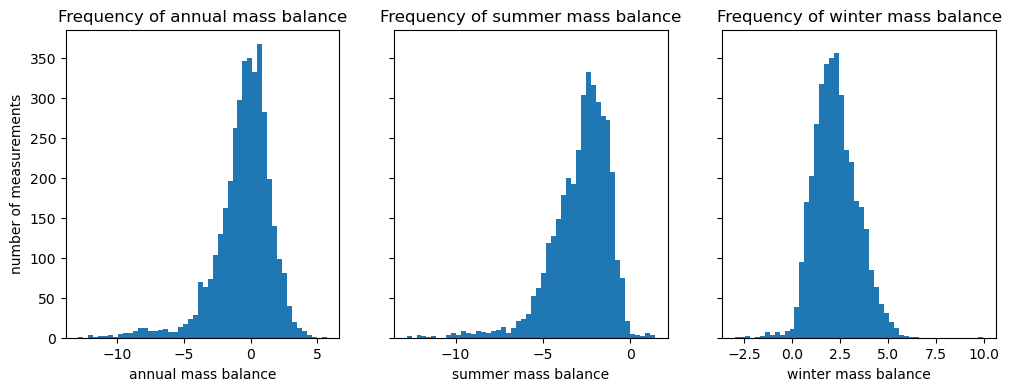

In [23]:
# Number of measurements by mass balance

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4), sharey=True)
data['balance_netto'].plot.hist(bins=50, ax=ax1)
ax1.set_title('Frequency of annual mass balance')
ax1.set_ylabel('number of measurements')
ax1.set_xlabel('annual mass balance')

data['balance_summer'].plot.hist(bins=50, ax=ax2)
ax2.set_title('Frequency of summer mass balance')
ax2.set_xlabel('summer mass balance')

data['balance_winter'].plot.hist(bins=50, ax=ax3)
ax3.set_title('Frequency of winter mass balance')
ax3.set_xlabel('winter mass balance')

## Mass balance per glacier

Only two glaciers have mass balance values in the order of -10 m w.e: 1094 (Engabreen, high latitude, low elevation) and 2297 (Nigardsbreen, low latitude, low elevation)

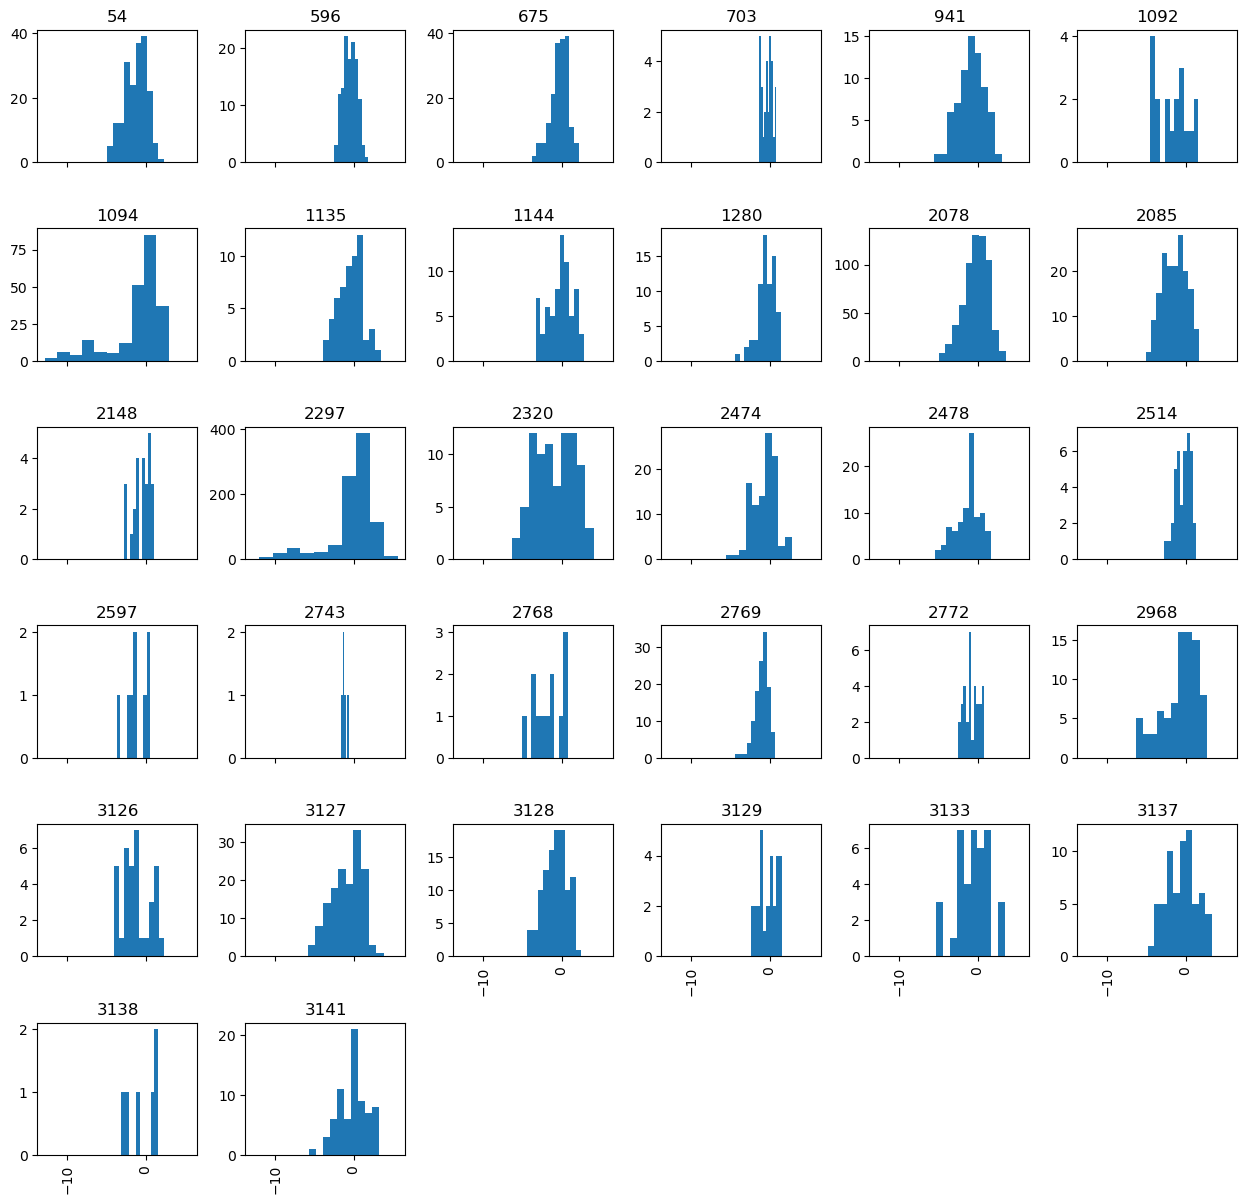

In [70]:
# Plot mass balance values per glacier
data['balance_netto'].hist(by=data['BREID'], figsize=(15,15), sharex=True, grid=True)
plt.show()

In [129]:
#Dictionary of region per glacier ID
mapping = {54 : 'FIN', 596 : 'NAR', 675 : 'NAR', 941 : 'BLA', 1092 : 'SVA',
           1094 : 'SVA', 1135 : 'SVA', 1280 : 'SVA', 1144 : 'SVA', 2078 : 'ALF',
           2085 : 'ALF', 2148 : 'JOB', 2297 : 'JOB', 2320 : 'JOB', 2474 : 'JOB',
           2478 : 'JOB', 2514 : 'JOB', 2968 : 'HAR', 2597 : 'JOT', 2768 : 'JOT',
           2769 : 'JOT', 2772 : 'JOT', 2743 : 'JOT', 2769 : 'JOT', 3126 : 'FOL', 
           3127 : 'FOL', 3128 : 'FOL', 3129 : 'FOL', 3133 : 'FOL', 3137 : 'FOL', 
           3138 : 'FOL', 3141 : 'FOL'}

# Map region to glacier ID
data['region'] = data.BREID.map(mapping)


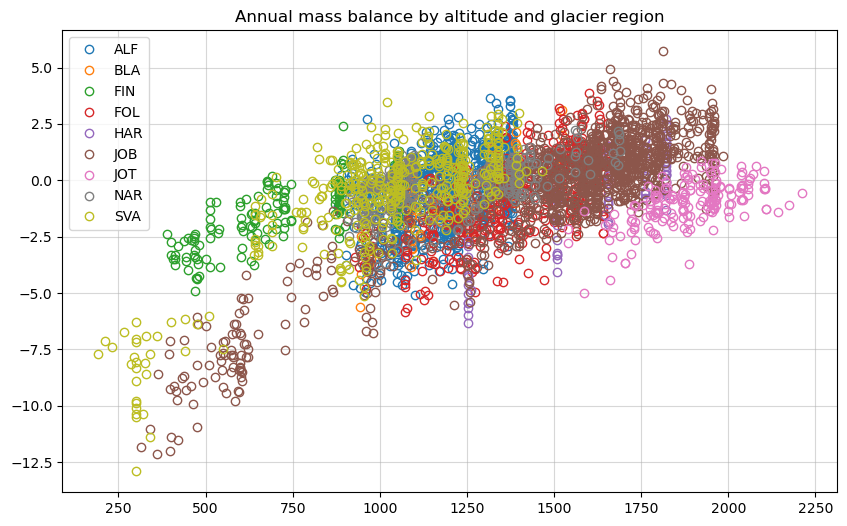

In [140]:
# Group glaciers by region
groups = data.groupby('region')

# Plot mass balance as a function of altitude per region
fig, ax = plt.subplots(figsize=(10,6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.altitude, group.balance_netto, marker='o', linestyle='', ms=6, label=name, mfc='None')
ax.legend()
ax.set_title('Annual mass balance by altitude and glacier region')
plt.grid(alpha=0.5)
plt.show()

In [133]:
#Dictionary of region per glacier ID
mapping_reg = {'FIN' : 'N', 'BLA' : 'N', 'NAR' : 'N', 'SVA' : 'N', 
           'ALF' : 'W-mar', 'FOL' : 'W', 'HAR' : 'W', 'JOB' : 'W', 'JOT' : 'E'}
data['geo_region'] = data.region.map(mapping_reg)


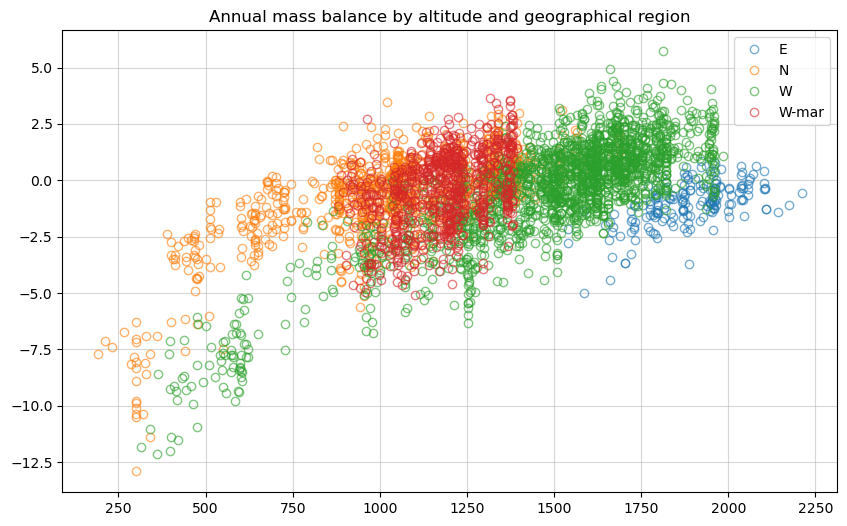

In [154]:
# Group glaciers by broader geographical region
groups = data.groupby('geo_region')

# Plot mass balance as a function of altitude per region
fig, ax = plt.subplots(figsize=(10,6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.altitude, group.balance_netto, marker='o', linestyle='', ms=6, label=name, mfc='None', alpha=0.6)
ax.legend()
ax.set_title('Annual mass balance by altitude and geographical region')
plt.grid(alpha=0.5)
plt.show()

In [151]:
print('Number of measurements of mass balance values lower than -5 m w.e.: ', data[(data['balance_netto']<-5.0)].BREID.count())
print('Glaciers with mass balance values lower than -5 m w.e.: ', data[(data['balance_netto']<-5.0)].BREID.unique())
print('Number of measurements of mass balance values lower than -10 m w.e.: ', data[(data['balance_netto']<-10.0)].BREID.count())
print('Glaciers with mass balance values lower than -10 m w.e.: ', data[(data['balance_netto']<-10.0)].BREID.unique())

Number of measurements of mass balance values lower than -5 m w.e.:  132
Glaciers with mass balance values lower than -5 m w.e.:  [ 941 1094 2085 2297 2320 2474 2478 2768 2968 3127 3133 3141]
Number of measurements of mass balance values lower than -10 m w.e.:  13
Glaciers with mass balance values lower than -10 m w.e.:  [1094 2297]


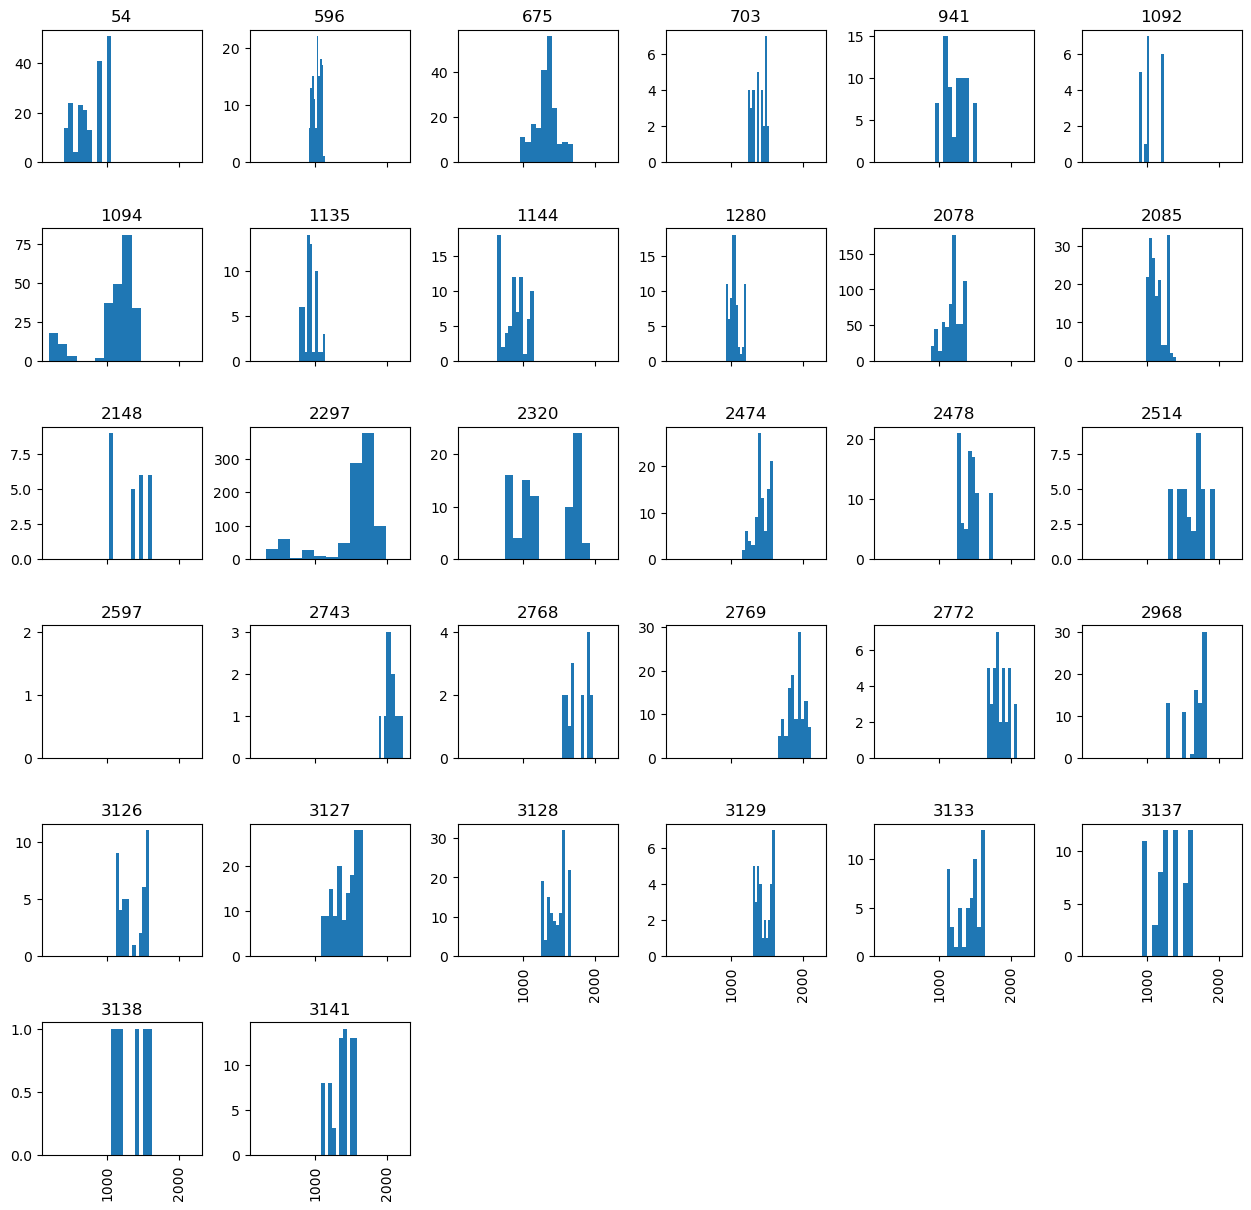

In [71]:
# Plot mass balance values per glacier
data['altitude'].hist(by=data['BREID'], figsize=(15,15), sharex=True, grid=True)
plt.show()

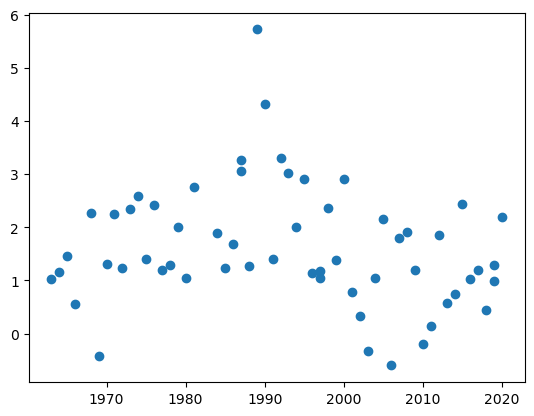

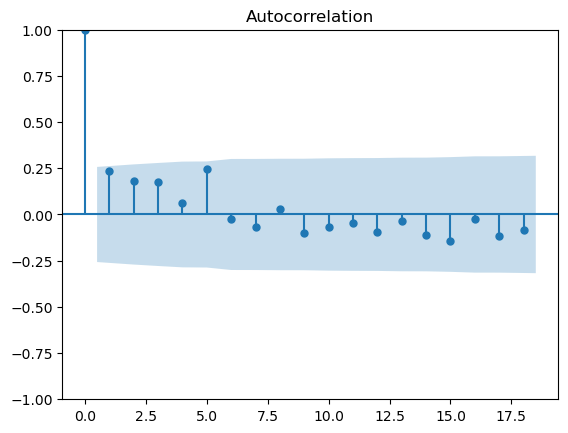

In [185]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

data_nig = data[data['BREID']==2297]
data_stake = data_nig[data_nig.location_id == 'N56']
#data_nig = data_nig.sort_values(by=['year'])

plt.plot(data_stake['year'], data_stake['balance_netto'], marker = 'o', linestyle='')
plt.show()
# Use the Autocorrelation function
# from the statsmodel library passing
# our DataFrame object in as the data
# Note: Limiting Lags to 50
plot_acf(x=np.flip(data_stake['balance_netto'].values))
# Show the AR as a plot
plt.show()

In [ ]:
# Autocorrelation is just the correlation of the data with itself. 
# So, instead of measuring the correlation between two random variables, 
# we are measuring the correlation between a random variable against itself.

<Axes: >

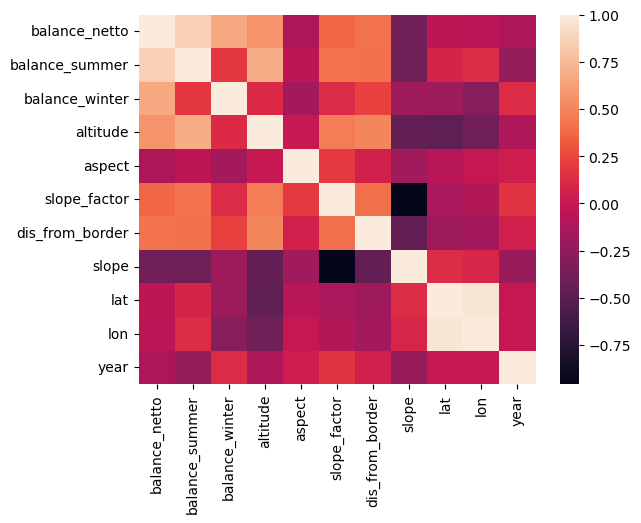

In [36]:
#Plot correlations topo
columns=['balance_netto','balance_summer','balance_winter','altitude','aspect',
         'slope_factor', 'dis_from_border','slope','lat','lon','year']
corr = data[columns].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Negative correlation between annual/summer balance and slope (higher slope = more positive mb?).
Negative correlation between altitude and slope (higher altitude = lower slope)

Lower elevations have steeper slopes - Nigardsbreen?

Slope correlates with slope factor, remove slope factor from features.

In [49]:
list_cols = list(data.columns)#.to_list#[[-168,:]]
columns = ['balance_netto','balance_summer','balance_winter']
columns.extend(list_cols[-169:])
corr = data[columns].corr()


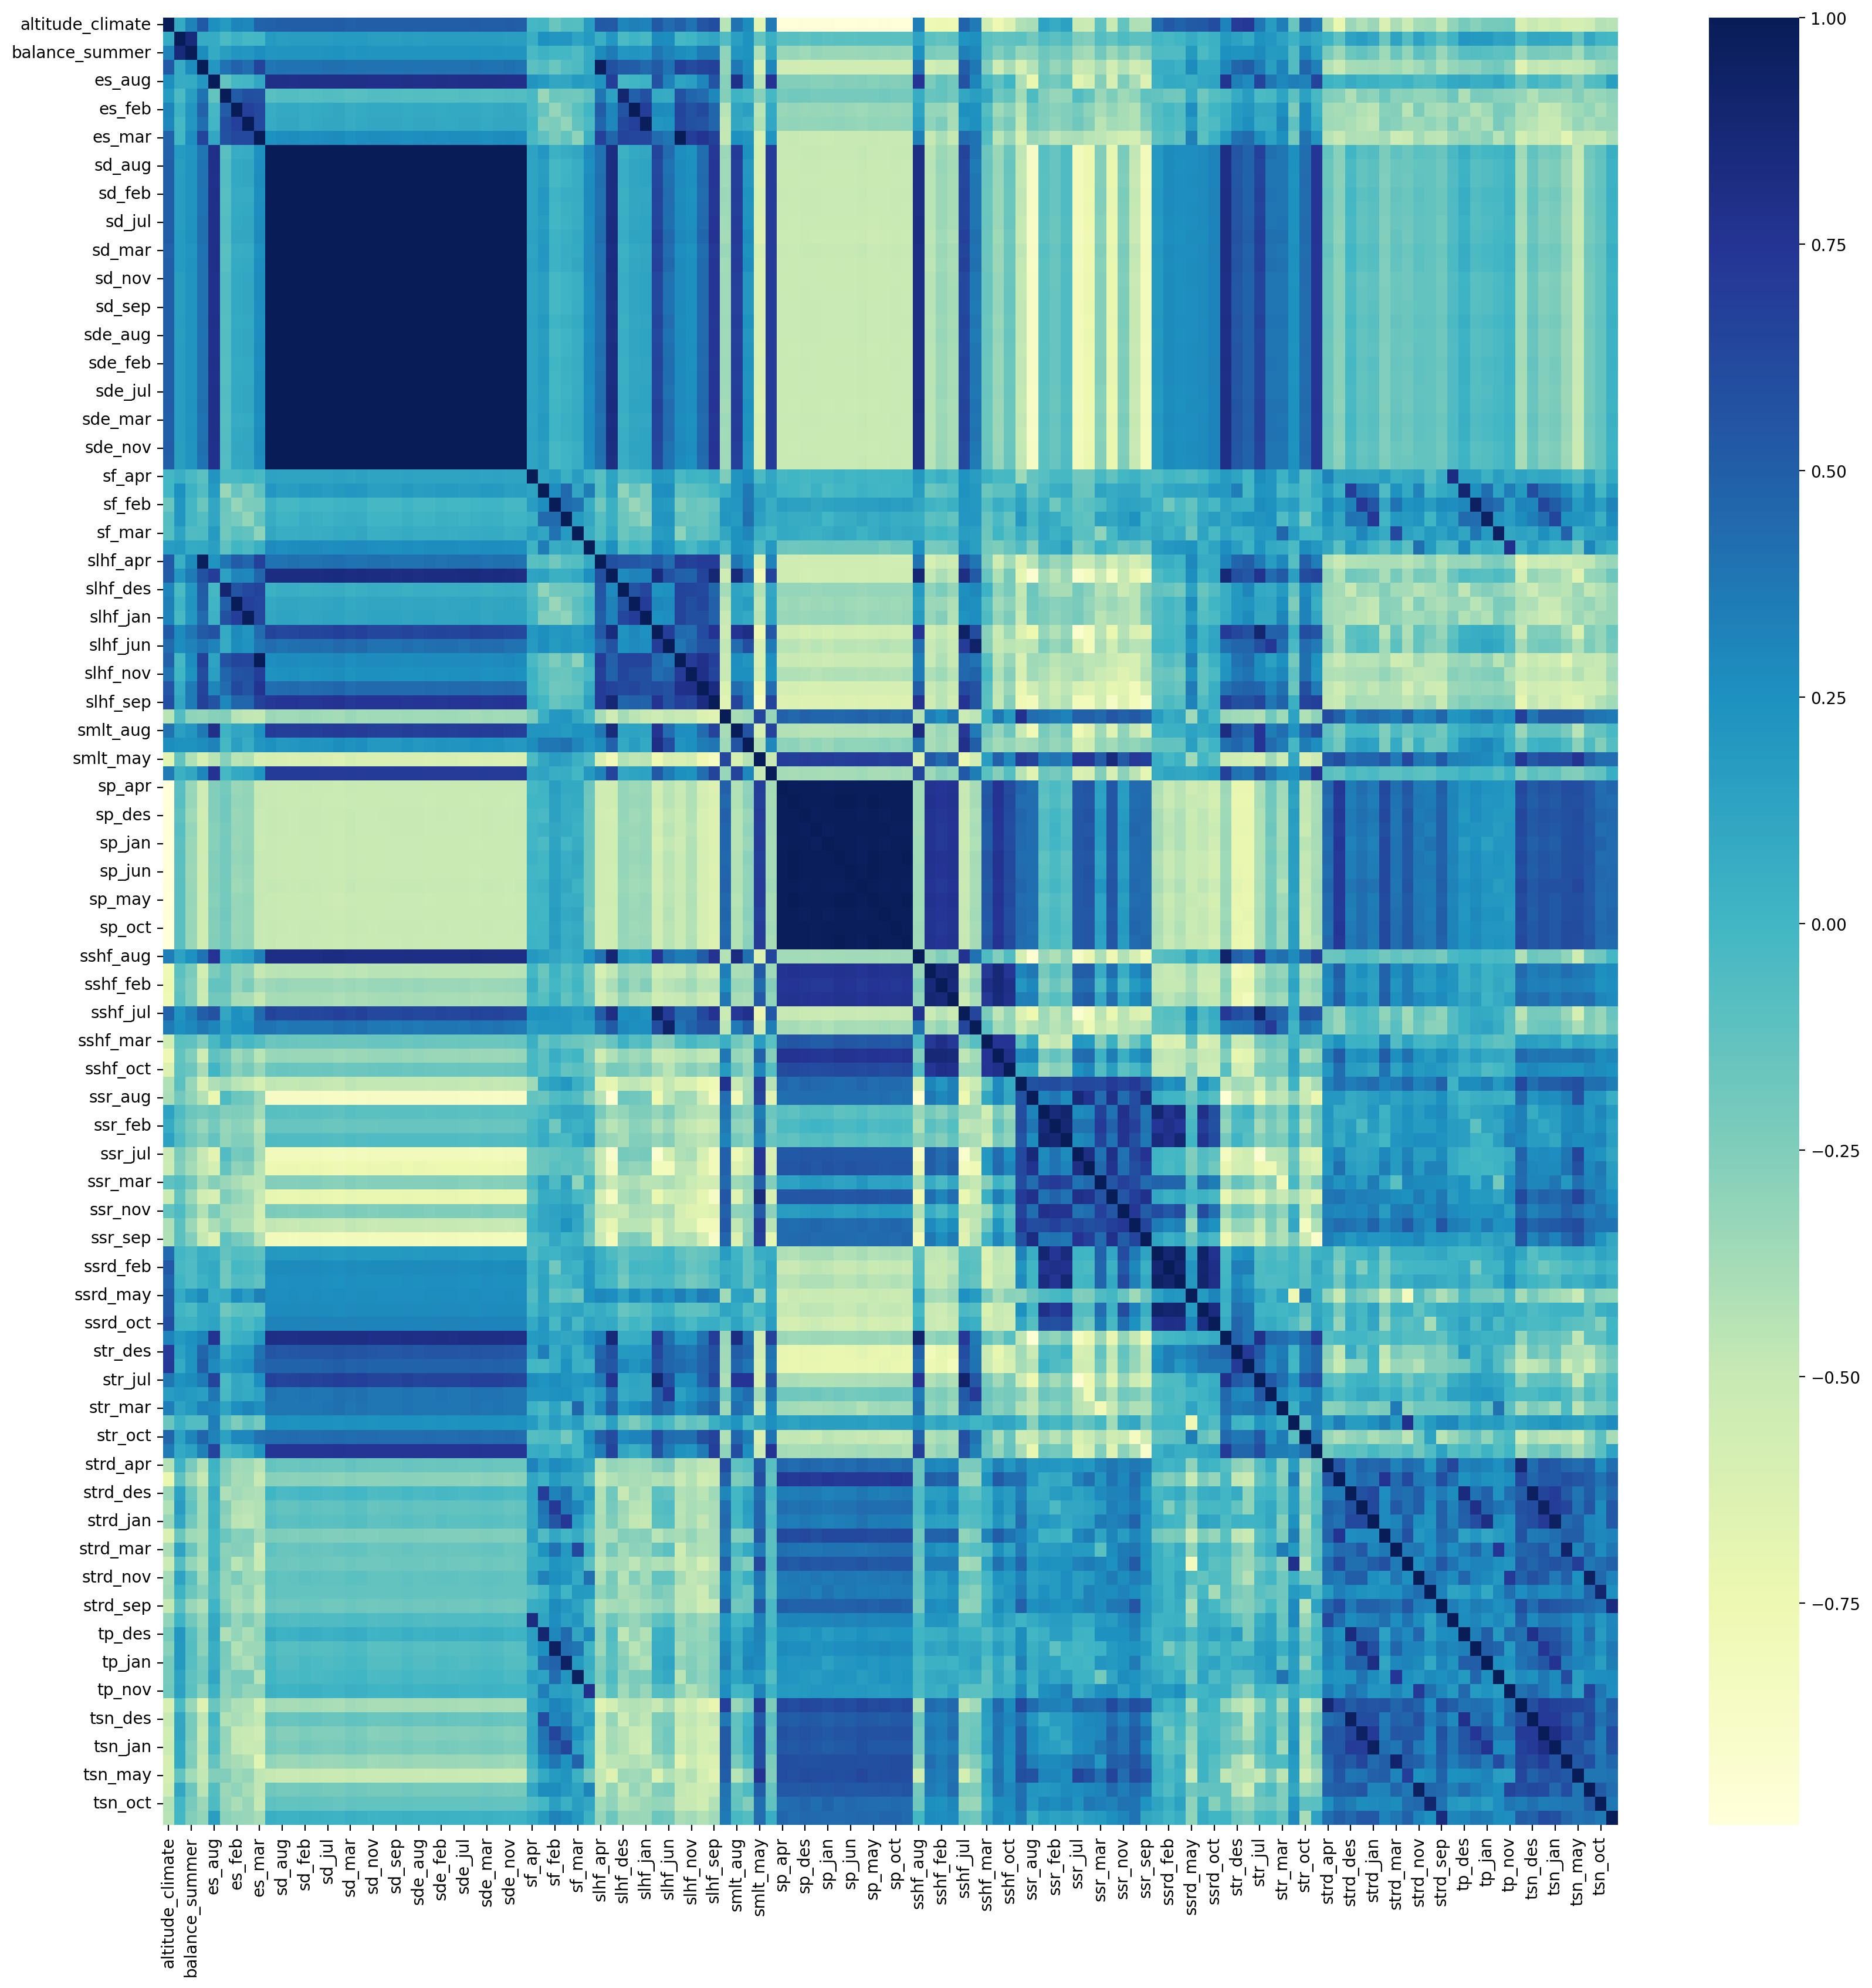

In [54]:
from numpy.random      import randn
from pandas            import DataFrame
from seaborn           import heatmap
from matplotlib.pyplot import show
from itertools         import combinations

def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

#labels = [chr(x) for x in range(65,91)]
#corrDf = DataFrame(randn(26,26), index=labels, columns=labels).corr()

#heatmap(corrDf,cmap="YlGnBu")
fig, ax = plt.subplots(1,1,figsize=(20,20), dpi=200)
heatmap(absHighPass(corr,0.75),cmap="YlGnBu", ax=ax)
show()